In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [25]:
filename="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(filename, delimiter=', ', header=None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
     'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])
print(df.head())

<ipython-input-25-703c29ecd616>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, delimiter=', ', header=None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [26]:
#Explore the data
print(df.describe())
print(df.groupby('capital-loss').size())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
capital-loss
0       31042
155         1
213         4
323     

In [14]:
#Dimensionality of DataFrame
n_records = df.shape[0]
print("Total number of records: {}".format(n_records))
n_greater_50k = df[df['income'] == ">50K"].shape[0]
print("Total number of records >50k: {}".format(n_greater_50k))

n_armed_forces = df[df['marital-status'] == "Married-AF-spouse"].shape[0]
print("Total number of armed forces spouse: {}".format(n_armed_forces))

n_married = df[df['marital-status'] == "Married-civ-spouse"].shape[0]
print("Total number of spouse: {}".format(n_married))

n_marital = df['marital-status'].shape[0]
print("total marital : {}".format(n_marital))

Total number of records: 32561
Total number of records >50k: 7841
Total number of armed forces spouse: 23
Total number of spouse: 14976
total marital : 32561


In [27]:
#drop occupation where unknown
df = df[df.occupation != '?']
df = df.drop_duplicates(keep='first')

In [19]:
#Find any Null Values
print(df.isnull().sum(axis=0))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


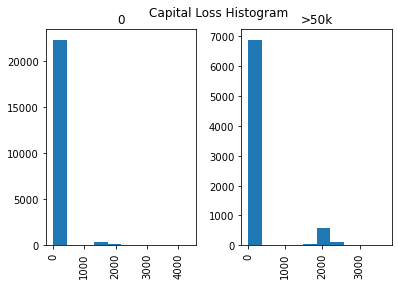

In [33]:
df.hist(column='capital-loss', by='income')
plt.suptitle("Capital Loss Histogram")
plt.title(">50k")
plt.show()

In [28]:
#convert categorical data into numerical values
for col_name in df.columns:
    if (df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [29]:
#Normalize the data
#values now between 0 and 1
d = preprocessing.normalize(df,axis=0)
scaled_df = pd.DataFrame(d,columns=df.columns)
data_normalized = preprocessing.normalize(df, norm='l1')

In [30]:
print("Kendall Correlation: ")
print(scaled_df.corr(method='kendall'))

Kendall Correlation: 
                     age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.053104 -0.052857  -0.011815       0.055764   
workclass       0.053104   1.000000 -0.028588   0.004717       0.005752   
fnlwgt         -0.052857  -0.028588  1.000000  -0.014354      -0.025356   
education      -0.011815   0.004717 -0.014354   1.000000       0.189889   
education-num   0.055764   0.005752 -0.025356   0.189889       1.000000   
marital-status -0.294337  -0.035760  0.029145  -0.015825      -0.049154   
occupation     -0.004333   0.008284 -0.000242  -0.032500       0.068222   
relationship   -0.230714  -0.080668  0.009695   0.010209      -0.077004   
race            0.019700   0.058808 -0.030635   0.006777       0.037474   
sex             0.075753   0.091182  0.020534  -0.029864       0.001763   
capital-gain    0.098961   0.025021 -0.006166   0.006084       0.106312   
capital-loss    0.050225   0.005240 -0.006184   0.005811       0.065804   
hou

In [34]:
n_zerogain = scaled_df[scaled_df['capital-gain'] == 0].shape[0]
print("Total number of records with zero capital gain: {}".format(n_zerogain))

n_zeroloss = scaled_df[scaled_df['capital-loss'] == 0].shape[0]
print("Total number of records with zero capital loss: {}".format(n_zeroloss))

Total number of records with zero capital gain: 28105
Total number of records with zero capital loss: 29233


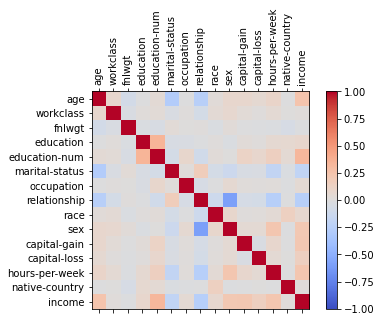

In [37]:
#colormap to show correlation
corr = scaled_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(scaled_df.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(scaled_df.columns)
ax.set_yticklabels(scaled_df.columns)
plt.show()